# Thực hành 


In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
%matplotlib inline
#plt.gray()


## Phát sinh dữ liệu

## KMeans trên tập dữ liệu đã phát sinh

In [2]:
X,Y = make_blobs(n_samples=150, n_features=2, centers=2)

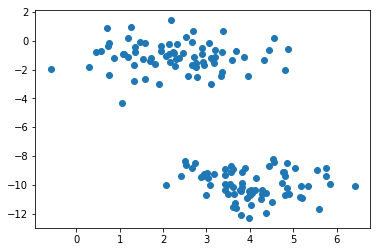

In [3]:
plt.scatter(X[:,0],X[:,1])

plt.show()

In [4]:
print(Y)

[0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1
 0 0]


In [5]:
model = KMeans(n_clusters=2)
labels1 = model.fit_predict(X)

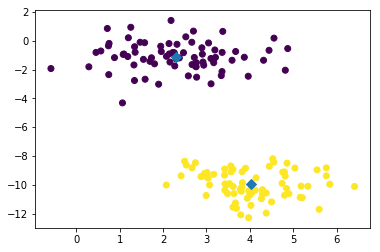

In [16]:
plt.scatter(X[:,0],X[:,1], c=labels1 ,alpha=1)

center_points=model.cluster_centers_
center_points_x = center_points[:,0]
center_points_y = center_points[:,1]

plt.scatter(ctp_x,ctp_y,marker='D',s=50)

plt.show()

# Thuc hanh bai tap 2

In [10]:
# Load dataset
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [11]:
model2 = KMeans(n_clusters=10)
labels = model2.fit_predict(digits.data)


In [12]:
df=pd.DataFrame({'labels':labels,'Truth labels':digits.target})
ct = pd.crosstab(df['labels'],df['Truth labels'])
print(ct)               

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   1    0    2    0  136    0    1    4    6
1             177   0    1    0    0    0    1    0    0    0
2               0   1   13  155    0    1    0    0    2    6
3               0   2    0    0    0    1  177    0    2    0
4               0   0    2   12    0   42    0    0   50  139
5               0   0    3    7    7    0    0  174    4    7
6               0  99    8    7    4    0    2    2  103    2
7               1   0    0    0  163    2    0    0    0    0
8               0  24  148    0    0    0    0    0    3    0
9               0  55    2    0    7    0    1    2    6   20


lables_predict: 0
 True:  5


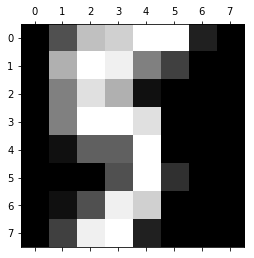

In [13]:
n=15
plt.matshow(digits.images[n])
print('lables_predict:',labels[n])
print(' True: ', digits.target[n])

In [14]:
# Spectral_clustering

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
import numpy as np
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity

# dist = DistanceMetric.get_metric('euclidean')
# graph=dist.pairwise(digits.data) 
graph = cosine_similarity(digits.data, Y=None, dense_output=True)
labels3 = spectral_clustering(graph, n_clusters=10, eigen_solver='arpack')


In [15]:
df1=pd.DataFrame({'labels':labels3,'Truth labels':digits.target})
ct2=pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0  58    5    5    1    0    0   15   40   35
1               0   0    1  146    0    0    0    0    6    2
2               1   0    0    0  163    2    0    0    0    0
3               0   0    2    2   11    0    0  154    2    2
4               0  86   53    5    5    0    7   10  102    1
5               0   0    0   16    0   20    2    0    7  134
6               0   0    0    4    0  157    0    0    3    3
7               0   2    0    1    0    2  172    0   13    0
8               0  36  115    4    0    0    0    0    1    0
9             177   0    1    0    1    1    0    0    0    3


lables_predict: 9
 True:  0


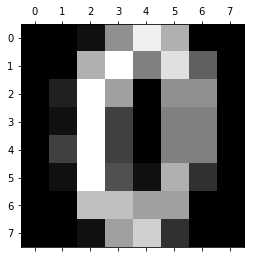

In [16]:
n=10
plt.matshow(digits.images[n])
print('lables_predict:',labels3[n])
print(' True: ', digits.target[n])
